In [1]:
import pandas as pd
df= pd.read_csv("C:/Users/shash/OneDrive/Desktop/Project/data_analysis_project/credit_card_transactions.csv" , encoding= "UTF-8")
df.head(6)

,Transaction ID,Customer ID,Transaction Date,Transaction Amount,Merchant Category,Transaction Type,Card Type,Customer Age,Customer Gender,Customer Location
0,a650ca32-321e-4a23-9191-cf9c22e0dd6c,b919ae4d-e613-439c-ada6-3461a0bea73c,2020-04-17,307.42,Healthcare,Refund,Amex,77,Male,West Jamesville
1,06bbca97-aa21-4c21-b2be-10c1766c7198,fc5a73d4-32d7-44c2-92e5-361b3bfeda68,2021-07-20,512.42,Healthcare,Refund,MasterCard,59,Female,Harperfort
2,83bdc537-962c-4a16-850b-150d4a2adfa0,04d79d75-5fb6-45ab-a17b-a947390bbbbf,2023-01-31,310.46,Clothing,Refund,Visa,83,Male,East Julie
3,fccc0a20-10c7-438d-8504-1a2f75910e9e,0f0bea76-143c-4c8b-b6bb-7903e3425197,2024-01-30,460.29,Restaurant,Refund,Amex,56,Female,West Elizabethville
4,58ef3afc-b55a-4e20-92de-c5eb3835312b,28150d98-805c-4d84-86cd-d376b9eb7521,2021-10-25,888.96,Grocery,Refund,Amex,52,Female,Wellsmouth
5,1767c9f3-5827-42a1-b9e6-84a4967a2c03,2cd46cff-9193-48ca-81f4-940a905e8b69,2022-05-17,647.74,Restaurant,Purchase,MasterCard,67,Male,North Anthony


In [2]:
df.isna().sum()

Transaction ID        0
Customer ID           0
Transaction Date      0
Transaction Amount    0
Merchant Category     0
Transaction Type      0
Card Type             0
Customer Age          0
Customer Gender       0
Customer Location     0
dtype: int64

In [3]:
df.columns

Index(['Transaction ID', 'Customer ID', 'Transaction Date',
       'Transaction Amount', 'Merchant Category', 'Transaction Type',
       'Card Type', 'Customer Age', 'Customer Gender', 'Customer Location'],
      dtype='object')

In [4]:
df['Card Type'].unique()

array(['Amex', 'MasterCard', 'Visa', 'Discover'], dtype=object)

In [5]:
df['Merchant Category'].unique()

array(['Healthcare', 'Clothing', 'Restaurant', 'Grocery', 'Electronics',
       'Travel', 'Utilities'], dtype=object)

In [6]:
df['Customer Gender'].value_counts()

Customer Gender
Female    5076
Male      4924
Name: count, dtype: int64

## DATA ANALYSIS

1. count of transaction date in a range dates
2. unique customer locations with number of transactions happened there
3. how many times transaction occured from different types credit cards
4. check if the customer id repeated and how many times it maybe repeated
5. sum of transaction amount to make a graph with x axis as merchant category e.g. In healthcare merchant how much transaction occured totally from 2020 to 2024
6. transaction purchase or refund like how many times it occured
7. What is the average transaction amount for different customer age groups?
8. Analyze the monthly trends in transaction amounts and counts.
9. Identify transactions that are above a certain threshold (e.g., $500) and analyze their characteristics.

In [7]:
df.head(3)

,Transaction ID,Customer ID,Transaction Date,Transaction Amount,Merchant Category,Transaction Type,Card Type,Customer Age,Customer Gender,Customer Location
0,a650ca32-321e-4a23-9191-cf9c22e0dd6c,b919ae4d-e613-439c-ada6-3461a0bea73c,2020-04-17,307.42,Healthcare,Refund,Amex,77,Male,West Jamesville
1,06bbca97-aa21-4c21-b2be-10c1766c7198,fc5a73d4-32d7-44c2-92e5-361b3bfeda68,2021-07-20,512.42,Healthcare,Refund,MasterCard,59,Female,Harperfort
2,83bdc537-962c-4a16-850b-150d4a2adfa0,04d79d75-5fb6-45ab-a17b-a947390bbbbf,2023-01-31,310.46,Clothing,Refund,Visa,83,Male,East Julie


## 8. Analyze the monthly trends in transaction amounts and counts

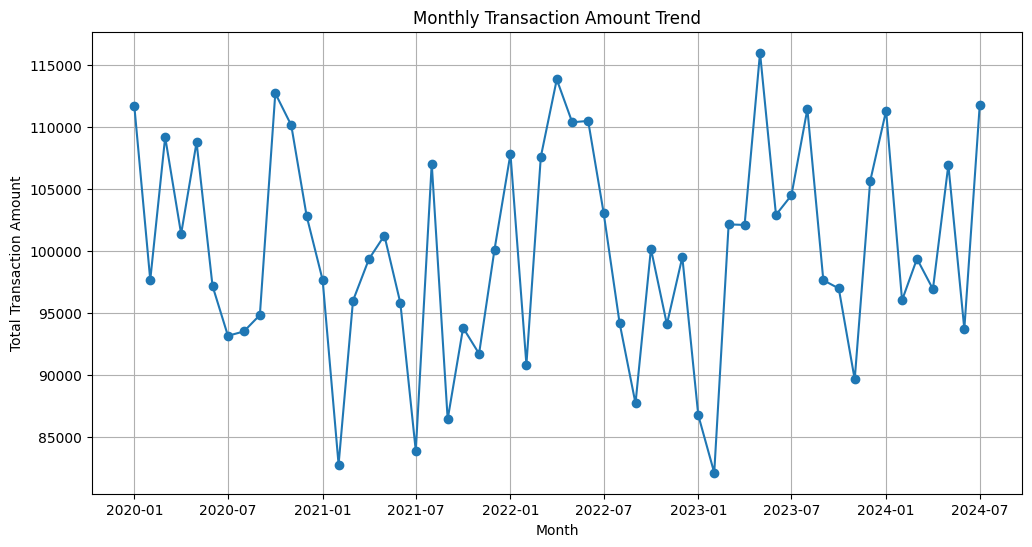

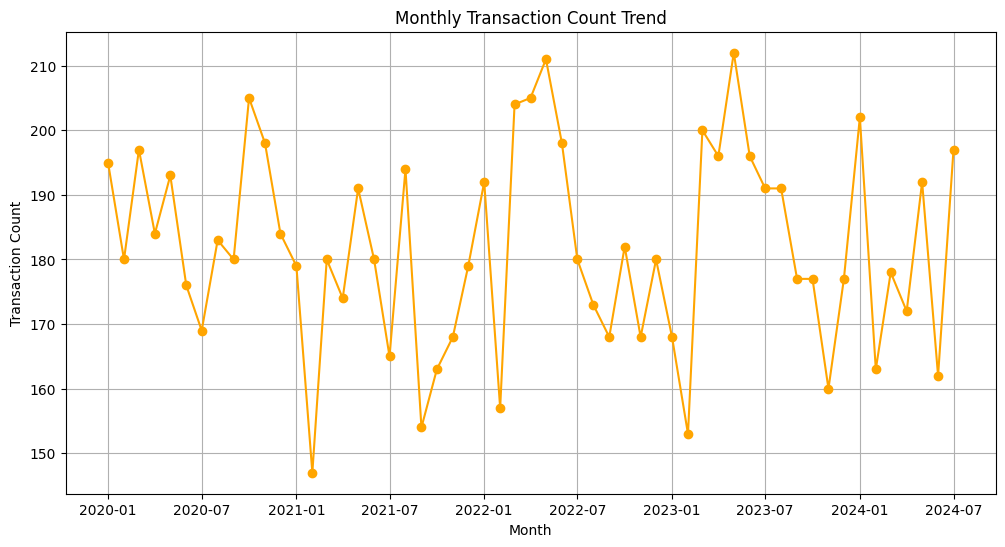

In [8]:
import matplotlib.pyplot as plt

# Convert the 'Transaction Date' column to datetime
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

# Extract month and year from the 'Transaction Date' column
df['YearMonth'] = df['Transaction Date'].dt.to_period('M')

# Group by 'YearMonth' and calculate the total transaction amount and count
monthly_data = df.groupby('YearMonth').agg(
    Total_Amount=pd.NamedAgg(column='Transaction Amount', aggfunc='sum'),
    Transaction_Count=pd.NamedAgg(column='Transaction ID', aggfunc='count')
).reset_index()

# Convert 'YearMonth' back to datetime for plotting purposes
monthly_data['YearMonth'] = monthly_data['YearMonth'].dt.to_timestamp()

# Plotting the total transaction amount trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['YearMonth'], monthly_data['Total_Amount'], marker='o')
plt.title('Monthly Transaction Amount Trend')
plt.xlabel('Month')
plt.ylabel('Total Transaction Amount')
plt.grid(True)
plt.show()

# Plotting the transaction count trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['YearMonth'], monthly_data['Transaction_Count'], marker='o', color='orange')
plt.title('Monthly Transaction Count Trend')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.grid(True)
plt.show()

## 1. count of transaction date in a range dates

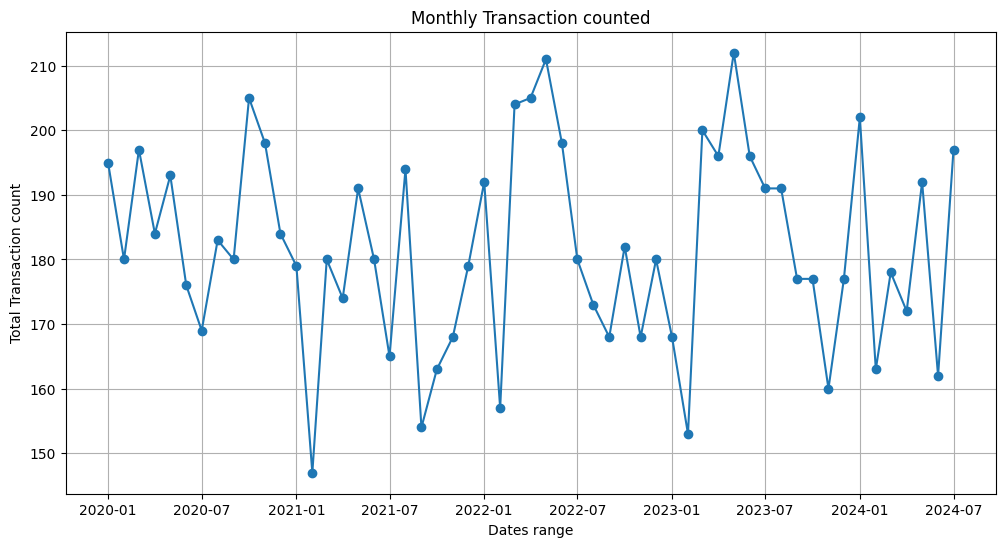

In [9]:
import matplotlib.pyplot as plt
counted= df.groupby('YearMonth').agg(trans=pd.NamedAgg(column='Transaction Amount', aggfunc='count'))

# Plotting the total transaction amount trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['YearMonth'], counted, marker='o')
plt.title('Monthly Transaction counted')
plt.xlabel('Dates range')
plt.ylabel('Total Transaction count')
plt.grid(True)
plt.show()

## 2. unique customer locations with number of transactions happened there

In [10]:
unique_values = df['Customer Location'].unique()
unique_count = df['Customer Location'].value_counts()

dff = pd.DataFrame({'Customer Locations': unique_values, 'Number of times transaction occured ': unique_count})
dff

,Customer Locations,Number of times transaction occured
Customer Location,,
West Michael,West Jamesville,12
Port David,Harperfort,12
North Michael,East Julie,12
South James,West Elizabethville,11
New John,Wellsmouth,10
...,...,...
Brendaview,North Moniqueville,1
New Carlosland,Port Kennethville,1
Patriciaville,North Rachelhaven,1


## 3. how many times transaction occured from different types credit cards

In [11]:
unique_values1 = df['Card Type'].unique()
unique_count1 = df['Card Type'].value_counts()

dff1 = pd.DataFrame({'Card type': unique_values1, 'Number of times transaction occured ': unique_count1})
dff1

,Card type,Number of times transaction occured
Card Type,,
Amex,Amex,2597
Visa,MasterCard,2528
Discover,Visa,2452
MasterCard,Discover,2423


## 5. sum of transaction amount to make a graph with x axis as merchant category e.g. In healthcare merchant how much transaction occured totally from 2020 to 2024

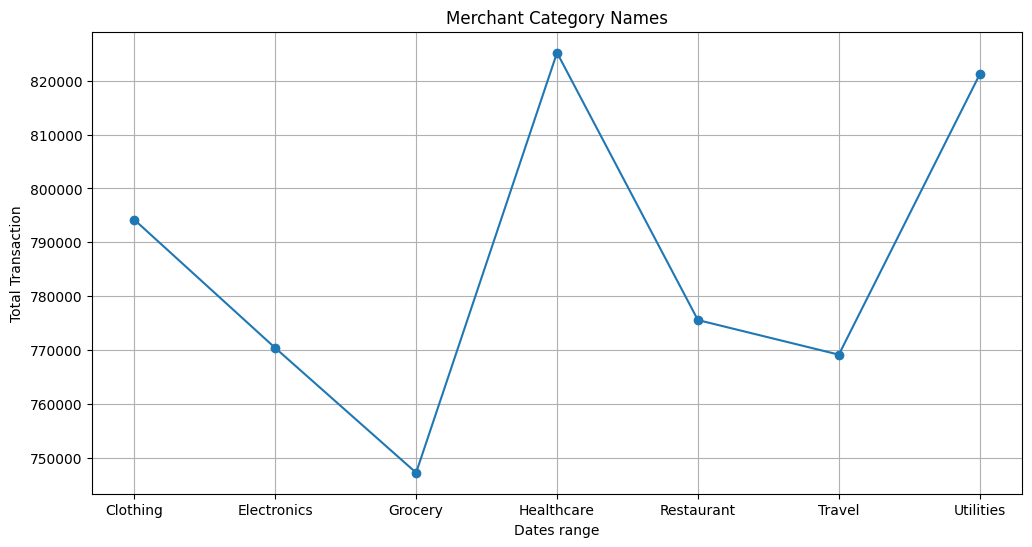

In [12]:
total_sum= df.groupby('Merchant Category').agg(trans=pd.NamedAgg(column='Transaction Amount', aggfunc='sum'))
plt.figure(figsize=(12, 6))
plt.plot(total_sum.index, total_sum, marker='o')
plt.title('Merchant Category Names')
plt.xlabel('Dates range')
plt.ylabel('Total Transaction')
plt.grid(True)
plt.show()

## 7. What is the average transaction amount for different customer age groups?

In [24]:
df.columns

Index(['Transaction ID', 'Customer ID', 'Transaction Date',
       'Transaction Amount', 'Merchant Category', 'Transaction Type',
       'Card Type', 'Customer Age', 'Customer Gender', 'Customer Location',
       'YearMonth', 'AgeGroup'],
      dtype='object')

In [22]:
df['AgeGroup'] = pd.cut(df['Customer Age'], bins=[0, 18, 30, 50, 70, 100],
                        labels=['Underage (0-18)', 'Young Adult (18-30)', 'Middle Age (30-50)',
                                'Adult (50-70)', 'Elder Citizen (70-100)'])

In [23]:
df.head(3)

,Transaction ID,Customer ID,Transaction Date,Transaction Amount,Merchant Category,Transaction Type,Card Type,Customer Age,Customer Gender,Customer Location,YearMonth,AgeGroup
0,a650ca32-321e-4a23-9191-cf9c22e0dd6c,b919ae4d-e613-439c-ada6-3461a0bea73c,2020-04-17,307.42,Healthcare,Refund,Amex,77,Male,West Jamesville,2020-04,Elder Citizen (70-100)
1,06bbca97-aa21-4c21-b2be-10c1766c7198,fc5a73d4-32d7-44c2-92e5-361b3bfeda68,2021-07-20,512.42,Healthcare,Refund,MasterCard,59,Female,Harperfort,2021-07,Adult (50-70)
2,83bdc537-962c-4a16-850b-150d4a2adfa0,04d79d75-5fb6-45ab-a17b-a947390bbbbf,2023-01-31,310.46,Clothing,Refund,Visa,83,Male,East Julie,2023-01,Elder Citizen (70-100)


In [36]:
df.groupby('AgeGroup').agg(tran=('Transaction Amount', 'mean'))

C:\Users\shash\AppData\Local\Temp\ipykernel_8224\3076584278.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('AgeGroup').agg(tran=('Transaction Amount', 'mean'))


,tran
AgeGroup,
Underage (0-18),513.956074
Young Adult (18-30),550.857985
Middle Age (30-50),548.677556
Adult (50-70),553.651113
Elder Citizen (70-100),550.155955
